Grayscale image saved at C:\Users\zayt\Desktop\0120_gray.jpg


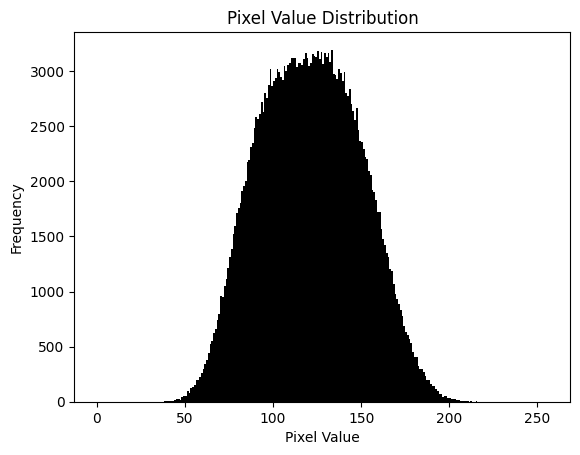

In [21]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Image Transformation - Convert to Grayscale
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
image_path = os.path.join(desktop_path, "0120.jpg")  # Update the filename if needed

# Load the color image
color_image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Save the grayscale image on desktop
gray_image_path = os.path.join(desktop_path, "0120_gray.jpg")
cv2.imwrite(gray_image_path, gray_image)
print(f"Grayscale image saved at {gray_image_path}")

# Step 2: Baseline Defect Detection Approach
# Draw the histogram of pixel values
plt.hist(gray_image.flatten(), bins=256, range=[0, 256], color='black')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Distribution')
plt.show()

Step 1: In this step, the script loads a color image of linen from the desktop, converts it to grayscale using the OpenCV library, and saves the resulting grayscale image back to the desktop.

Step 2: The script proceeds to implement a baseline defect detection approach. Initially, it draws a histogram of pixel values from the grayscale image. This histogram provides insights into the distribution of pixel values, serving as a fundamental step in understanding the characteristics of the linen image.

Number of Defective Pixels (Baseline): 26


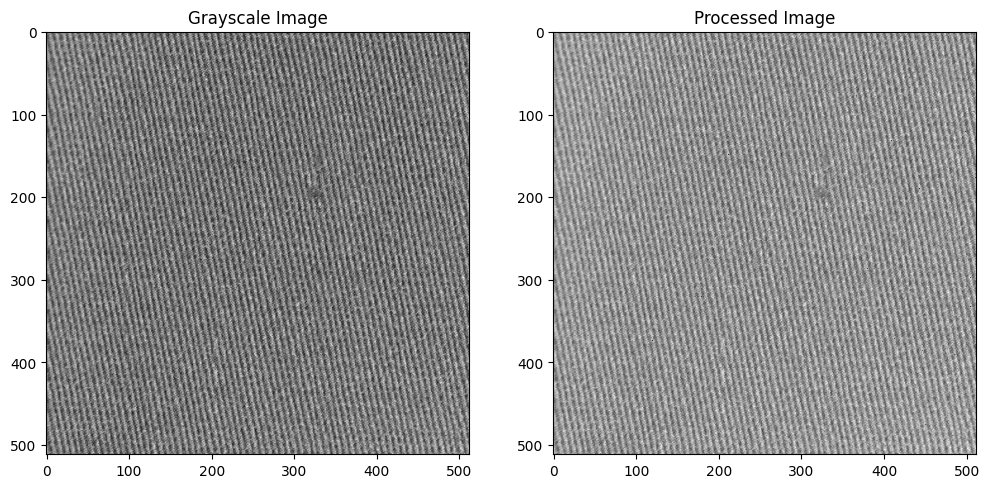

In [22]:
# Step 3: Outlier Identification
mu, sigma = norm.fit(gray_image.flatten())
lower_bound, upper_bound = norm.ppf(0.001, mu, sigma), norm.ppf(0.999, mu, sigma)
outliers = (gray_image < lower_bound) | (gray_image > upper_bound)

# Change the values of outliers to zero
def replace_outliers(image, outliers):
    image[outliers] = 0
    return image

result_image_global = replace_outliers(gray_image.copy(), outliers)

# Count of defective pixels in the whole image
defective_units_baseline = np.sum(outliers)

# Display the Grayscale and Processed Images at the end
print(f"Number of Defective Pixels (Baseline): {defective_units_baseline}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale Image')
plt.subplot(1, 2, 2), plt.imshow(result_image_global, cmap='gray'), plt.title('Processed Image')

plt.show()

It can be observed from the histogram that the normal distribution is a suitable model for identifying defects.

Step 3: This step focuses on identifying outliers in the grayscale linen image using a statistical approach. The script fits a normal distribution to the pixel values of the grayscale image, and pixels falling outside a specified range are considered outliers. The purpose is to isolate potential defects in the linen material based on statistical analysis.

Number of Defective Pixels (Patch-wise): 42159


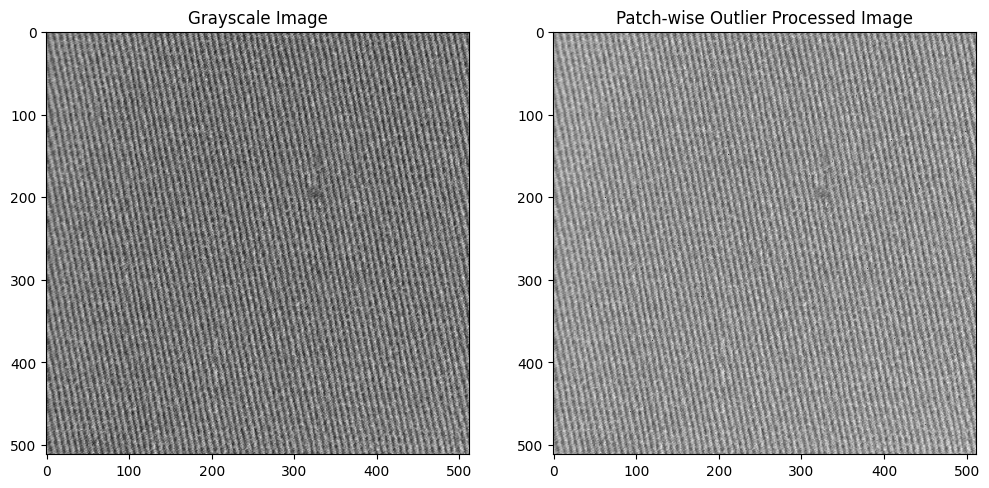

In [23]:
# Step 4: Patch-wise Outlier Identification on Grayscale Image
window_size = 51

result_image_patch = gray_image.copy()
h, w = gray_image.shape
defective_units_patch = np.zeros_like(gray_image, dtype=int)

for i in range(0, h - window_size + 1):
    for j in range(0, w - window_size + 1):
        patch = gray_image[i:i+window_size, j:j+window_size]
        patch_mu, patch_sigma = norm.fit(patch.flatten())
        patch_lower, patch_upper = norm.ppf(0.001, patch_mu, patch_sigma), norm.ppf(0.999, patch_mu, patch_sigma)
        patch_outliers = (patch < patch_lower) | (patch > patch_upper)
        result_image_patch[i:i+window_size, j:j+window_size][patch_outliers] = 0
        defective_units_patch[i:i+window_size, j:j+window_size] += patch_outliers.astype(int)

# Display the Grayscale and Patch-wise Outlier Processed Images with Defective Unit Counts
print(f"Number of Defective Pixels (Patch-wise): {np.sum(defective_units_patch)}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale Image')
plt.subplot(1, 2, 2), plt.imshow(result_image_patch, cmap='gray'), plt.title('Patch-wise Outlier Processed Image')

plt.show()

Step 4: This step enhances the outlier identification process by adopting a patch-wise approach. Instead of analyzing the entire image at once, the image is divided into patches, and outlier identification is performed individually for each patch. The goal is to achieve a more localized and nuanced detection of defects, providing a finer-grained analysis compared to the baseline approach. 

The number of defective pixels obtained through the patch-wise analysis (42159) is significantly higher than the baseline approach (26). This stark contrast indicates that the patch-wise analysis provides a more sensitive and localized detection of defects in the linen material.

Number of Defective Pixels (Rows): 24
Number of Defective Pixels (Columns): 14


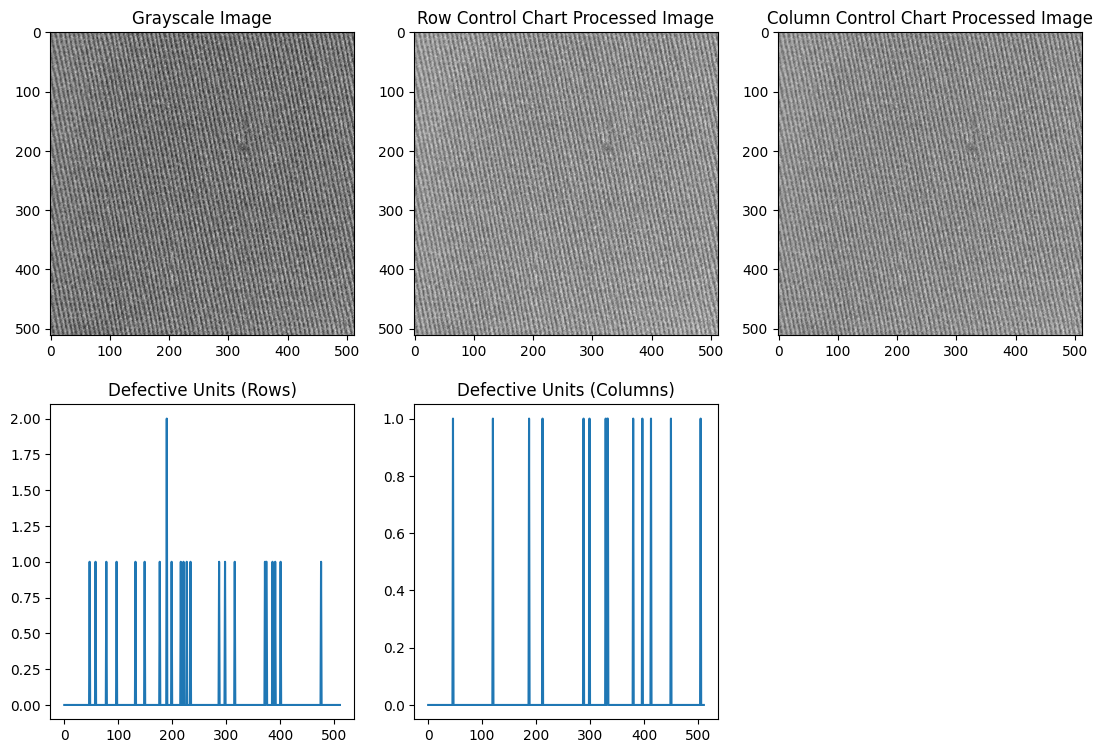

In [24]:
# Step 5: A Simple Defect Detection Approach from a Control Chart Perspective
# Construct control charts for each row
def control_chart_row(image):
    h, w = image.shape
    result_image_row = image.copy()
    defective_units_row = np.zeros(h, dtype=int)

    for i in range(h):
        row = image[i, :]
        row_mu, row_sigma = np.mean(row), np.std(row)
        row_lower, row_upper = norm.ppf(0.001, row_mu, row_sigma), norm.ppf(0.999, row_mu, row_sigma)
        row_outliers = (row < row_lower) | (row > row_upper)
        result_image_row[i, :][row_outliers] = 0
        defective_units_row[i] = np.sum(row_outliers)

    return result_image_row, defective_units_row

# Construct control charts for each column
def control_chart_column(image):
    h, w = image.shape
    result_image_column = image.copy()
    defective_units_column = np.zeros(w, dtype=int)

    for j in range(w):
        column = image[:, j]
        column_mu, column_sigma = np.mean(column), np.std(column)
        column_lower, column_upper = norm.ppf(0.001, column_mu, column_sigma), norm.ppf(0.999, column_mu, column_sigma)
        column_outliers = (column < column_lower) | (column > column_upper)
        result_image_column[:, j][column_outliers] = 0
        defective_units_column[j] = np.sum(column_outliers)

    return result_image_column, defective_units_column

# Apply control chart on rows
result_image_row, defective_units_row = control_chart_row(gray_image.copy())

# Apply control chart on columns
result_image_column, defective_units_column = control_chart_column(gray_image.copy())

# Display the Grayscale and Processed Images with Control Charts and Defective Unit Counts
print(f"Number of Defective Pixels (Rows): {np.sum(defective_units_row)}")
print(f"Number of Defective Pixels (Columns): {np.sum(defective_units_column)}")

plt.figure(figsize=(18, 9))

plt.subplot(2, 4, 1), plt.imshow(gray_image, cmap='gray'), plt.title('Grayscale Image')
plt.subplot(2, 4, 2), plt.imshow(result_image_row, cmap='gray'), plt.title('Row Control Chart Processed Image')
plt.subplot(2, 4, 3), plt.imshow(result_image_column, cmap='gray'), plt.title('Column Control Chart Processed Image')

plt.subplot(2, 4, 5), plt.plot(defective_units_row), plt.title('Defective Units (Rows)')
plt.subplot(2, 4, 6), plt.plot(defective_units_column), plt.title('Defective Units (Columns)')

plt.show()

Step 5: Control charts are constructed for each row and column in the grayscale image. Deviations from expected statistical patterns are identified as potential defects.

Step 6:

Objective:
Implementing a 2D statistical process control for defect detection in linen images, addressing the limitations of traditional control charts designed for 1D time series data.

Proposal => Local Binary Pattern (LBP):
- Utilizes texture information in grayscale linen images.
- Captures spatial dependencies between pixel values.
- Forms the basis for a new statistic to identify irregularities.

Procedure:

- Original color images are converted to grayscale.
- LBP is computed for each pixel, considering its 8-pixel neighborhood.
- Adaptive thresholding is applied to distinguish defective pixels.
- Defective pixels are set to 0, creating a modified image.

Insights:

- Traditional control charts assume pixel independence, problematic for textured images.
- LBP introduces a 2D control strategy, considering spatial correlations for improved defect detection.


LBP-based control addresses autocorrelation challenges in linen images, offering a robust strategy for defect identification.

Image Loaded Successfully: True


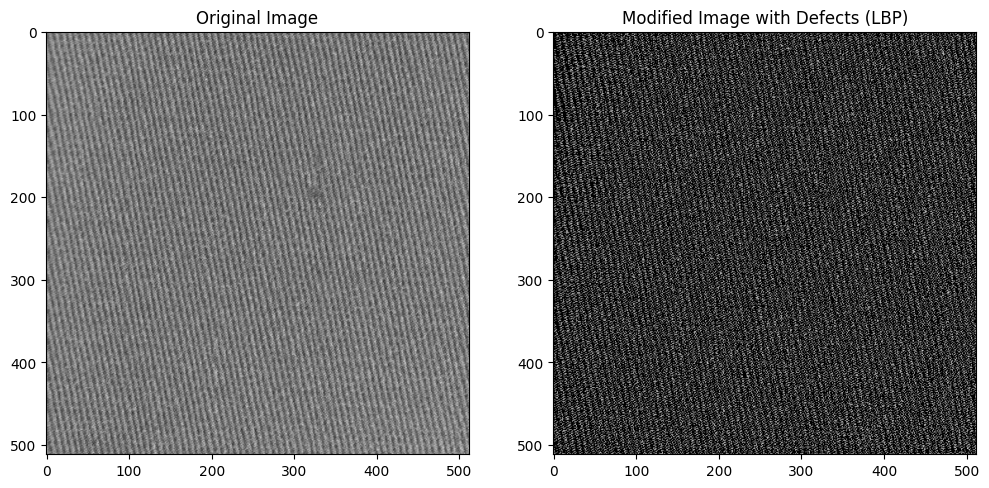

Number of Defective Pixels (LBP): 171114


In [25]:
# Step 6: My Proposal
from skimage import feature


def calculate_lbp(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate Local Binary Pattern
    lbp = feature.local_binary_pattern(gray_image, P=8, R=1, method="uniform")
    
    return lbp

def detect_defective_pixels_lbp(lbp, threshold):
    defective_pixels = lbp > threshold
    return defective_pixels

# Example usage:
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
image_path = os.path.join(desktop_path, "0120_gray.jpg")  # Update the filename if needed

try:
    image = cv2.imread(image_path)
    print("Image Loaded Successfully:", image is not None)

    # Calculate Local Binary Pattern
    lbp = calculate_lbp(image)

    # Use adaptive thresholding
    adaptive_threshold = cv2.adaptiveThreshold(lbp.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Detect defective pixels using Local Binary Pattern and adaptive thresholding
    defective_pixels_lbp = adaptive_threshold == 255

    # Modify the image by setting defective pixels to 0
    modified_image_lbp = image.copy()
    modified_image_lbp[defective_pixels_lbp] = 0

    # Display the original and modified images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(modified_image_lbp, cv2.COLOR_BGR2RGB)), plt.title('Modified Image with Defects (LBP)')

    plt.show()

    # Print the number of defective pixels using LBP
    num_defective_pixels_lbp = np.sum(defective_pixels_lbp)
    print("Number of Defective Pixels (LBP):", num_defective_pixels_lbp)

except ValueError as e:
    print(e)
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

In [26]:
import random
# Function to generate 100 random integers between 2 and 196
random_integers = random.sample(range(2, 196), 100)
print(random_integers)

[37, 17, 57, 77, 71, 166, 172, 99, 137, 11, 183, 108, 146, 189, 129, 178, 100, 60, 74, 81, 182, 91, 87, 110, 86, 4, 8, 98, 118, 175, 42, 142, 45, 61, 75, 126, 170, 151, 114, 184, 18, 12, 84, 134, 63, 103, 21, 95, 73, 173, 163, 132, 143, 5, 171, 76, 50, 49, 30, 56, 116, 193, 65, 149, 195, 119, 158, 93, 138, 10, 169, 139, 125, 124, 136, 38, 157, 52, 70, 167, 31, 22, 80, 140, 123, 54, 33, 130, 64, 90, 78, 107, 39, 66, 94, 23, 135, 83, 97, 160]


Grayscale image saved at C:\Users\zayt\Desktop\0090_gray.jpg
Image Loaded Successfully: True


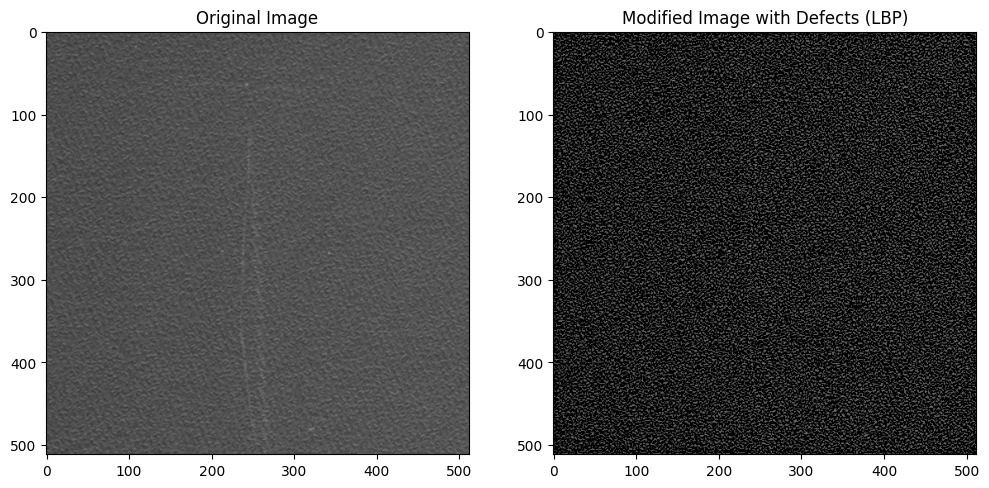

Number of Defective Pixels (LBP): 176445


In [27]:
# Step 1: Image Transformation - Convert to Grayscale
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
image_path = os.path.join(desktop_path, "0090.jpg")  # Update the filename if needed

# Load the color image
color_image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Save the grayscale image on desktop
gray_image_path = os.path.join(desktop_path, "0090_gray.jpg")
cv2.imwrite(gray_image_path, gray_image)
print(f"Grayscale image saved at {gray_image_path}")

from skimage import feature


def calculate_lbp(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate Local Binary Pattern
    lbp = feature.local_binary_pattern(gray_image, P=8, R=1, method="uniform")
    
    return lbp

def detect_defective_pixels_lbp(lbp, threshold):
    defective_pixels = lbp > threshold
    return defective_pixels

# Example usage:
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
image_path = os.path.join(desktop_path, "0090_gray.jpg")  # Update the filename if needed

try:
    image = cv2.imread(image_path)
    print("Image Loaded Successfully:", image is not None)

    # Calculate Local Binary Pattern
    lbp = calculate_lbp(image)

    # Use adaptive thresholding
    adaptive_threshold = cv2.adaptiveThreshold(lbp.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Detect defective pixels using Local Binary Pattern and adaptive thresholding
    defective_pixels_lbp = adaptive_threshold == 255

    # Modify the image by setting defective pixels to 0
    modified_image_lbp = image.copy()
    modified_image_lbp[defective_pixels_lbp] = 0

    # Display the original and modified images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(modified_image_lbp, cv2.COLOR_BGR2RGB)), plt.title('Modified Image with Defects (LBP)')

    plt.show()

    # Print the number of defective pixels using LBP
    num_defective_pixels_lbp = np.sum(defective_pixels_lbp)
    print("Number of Defective Pixels (LBP):", num_defective_pixels_lbp)

except ValueError as e:
    print(e)
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

Grayscale image saved at C:\Users\zayt\Desktop\0010_gray.jpg
Image Loaded Successfully: True


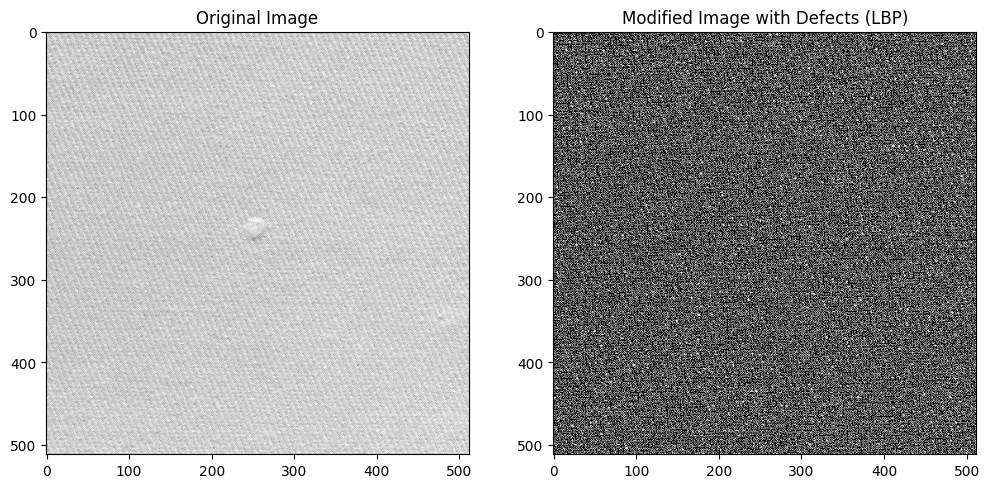

Number of Defective Pixels (LBP): 164579


In [28]:
# Step 1: Image Transformation - Convert to Grayscale
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
image_path = os.path.join(desktop_path, "0010.jpg")  # Update the filename if needed

# Load the color image
color_image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Save the grayscale image on desktop
gray_image_path = os.path.join(desktop_path, "0010_gray.jpg")
cv2.imwrite(gray_image_path, gray_image)
print(f"Grayscale image saved at {gray_image_path}")

from skimage import feature


def calculate_lbp(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate Local Binary Pattern
    lbp = feature.local_binary_pattern(gray_image, P=8, R=1, method="uniform")
    
    return lbp

def detect_defective_pixels_lbp(lbp, threshold):
    defective_pixels = lbp > threshold
    return defective_pixels

# Example usage:
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
image_path = os.path.join(desktop_path, "0010_gray.jpg")  # Update the filename if needed

try:
    image = cv2.imread(image_path)
    print("Image Loaded Successfully:", image is not None)

    # Calculate Local Binary Pattern
    lbp = calculate_lbp(image)

    # Use adaptive thresholding
    adaptive_threshold = cv2.adaptiveThreshold(lbp.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Detect defective pixels using Local Binary Pattern and adaptive thresholding
    defective_pixels_lbp = adaptive_threshold == 255

    # Modify the image by setting defective pixels to 0
    modified_image_lbp = image.copy()
    modified_image_lbp[defective_pixels_lbp] = 0

    # Display the original and modified images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(modified_image_lbp, cv2.COLOR_BGR2RGB)), plt.title('Modified Image with Defects (LBP)')

    plt.show()

    # Print the number of defective pixels using LBP
    num_defective_pixels_lbp = np.sum(defective_pixels_lbp)
    print("Number of Defective Pixels (LBP):", num_defective_pixels_lbp)

except ValueError as e:
    print(e)
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

Grayscale image saved at C:\Users\zayt\Desktop\0031_gray.jpg
Image Loaded Successfully: True


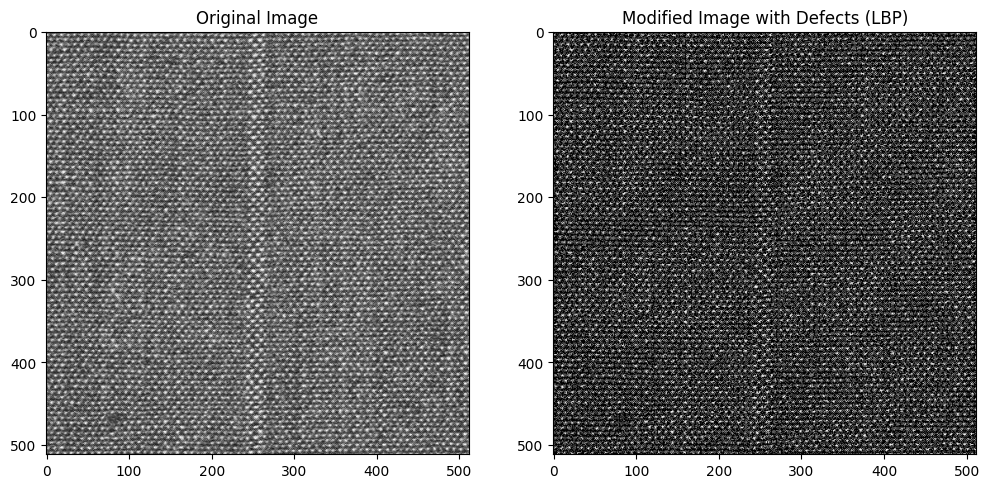

Number of Defective Pixels (LBP): 158595


In [29]:
# Step 1: Image Transformation - Convert to Grayscale
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
image_path = os.path.join(desktop_path, "0031.jpg")  # Update the filename if needed

# Load the color image
color_image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Save the grayscale image on desktop
gray_image_path = os.path.join(desktop_path, "0031_gray.jpg")
cv2.imwrite(gray_image_path, gray_image)
print(f"Grayscale image saved at {gray_image_path}")

from skimage import feature


def calculate_lbp(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate Local Binary Pattern
    lbp = feature.local_binary_pattern(gray_image, P=8, R=1, method="uniform")
    
    return lbp

def detect_defective_pixels_lbp(lbp, threshold):
    defective_pixels = lbp > threshold
    return defective_pixels

# Example usage:
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
image_path = os.path.join(desktop_path, "0031_gray.jpg")  # Update the filename if needed

try:
    image = cv2.imread(image_path)
    print("Image Loaded Successfully:", image is not None)

    # Calculate Local Binary Pattern
    lbp = calculate_lbp(image)

    # Use adaptive thresholding
    adaptive_threshold = cv2.adaptiveThreshold(lbp.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Detect defective pixels using Local Binary Pattern and adaptive thresholding
    defective_pixels_lbp = adaptive_threshold == 255

    # Modify the image by setting defective pixels to 0
    modified_image_lbp = image.copy()
    modified_image_lbp[defective_pixels_lbp] = 0

    # Display the original and modified images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(modified_image_lbp, cv2.COLOR_BGR2RGB)), plt.title('Modified Image with Defects (LBP)')

    plt.show()

    # Print the number of defective pixels using LBP
    num_defective_pixels_lbp = np.sum(defective_pixels_lbp)
    print("Number of Defective Pixels (LBP):", num_defective_pixels_lbp)

except ValueError as e:
    print(e)
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

Grayscale image saved at C:\Users\zayt\Desktop\0078_gray.jpg
Image Loaded Successfully: True


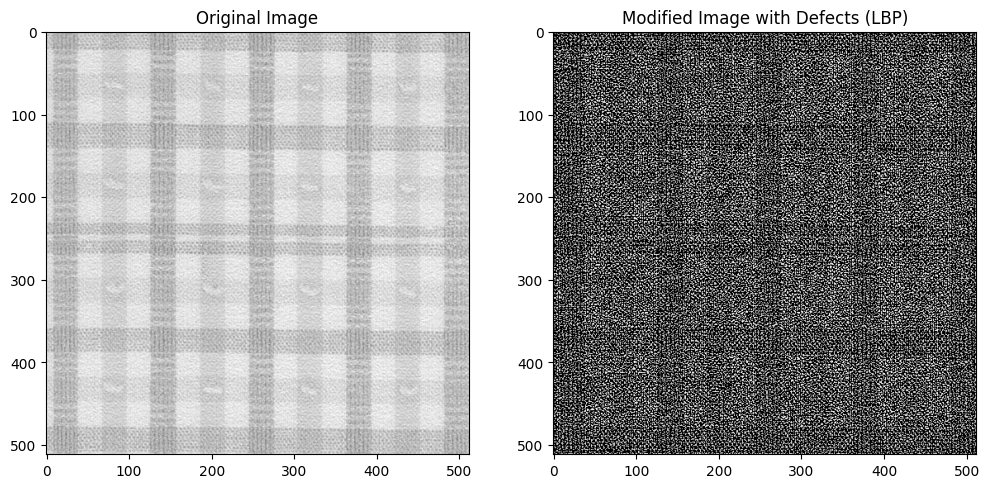

Number of Defective Pixels (LBP): 170984


In [30]:
# Step 1: Image Transformation - Convert to Grayscale
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
image_path = os.path.join(desktop_path, "0078.jpg")  # Update the filename if needed

# Load the color image
color_image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Save the grayscale image on desktop
gray_image_path = os.path.join(desktop_path, "0078_gray.jpg")
cv2.imwrite(gray_image_path, gray_image)
print(f"Grayscale image saved at {gray_image_path}")

from skimage import feature


def calculate_lbp(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate Local Binary Pattern
    lbp = feature.local_binary_pattern(gray_image, P=8, R=1, method="uniform")
    
    return lbp

def detect_defective_pixels_lbp(lbp, threshold):
    defective_pixels = lbp > threshold
    return defective_pixels

# Example usage:
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
image_path = os.path.join(desktop_path, "0078_gray.jpg")  # Update the filename if needed

try:
    image = cv2.imread(image_path)
    print("Image Loaded Successfully:", image is not None)

    # Calculate Local Binary Pattern
    lbp = calculate_lbp(image)

    # Use adaptive thresholding
    adaptive_threshold = cv2.adaptiveThreshold(lbp.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Detect defective pixels using Local Binary Pattern and adaptive thresholding
    defective_pixels_lbp = adaptive_threshold == 255

    # Modify the image by setting defective pixels to 0
    modified_image_lbp = image.copy()
    modified_image_lbp[defective_pixels_lbp] = 0

    # Display the original and modified images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(modified_image_lbp, cv2.COLOR_BGR2RGB)), plt.title('Modified Image with Defects (LBP)')

    plt.show()

    # Print the number of defective pixels using LBP
    num_defective_pixels_lbp = np.sum(defective_pixels_lbp)
    print("Number of Defective Pixels (LBP):", num_defective_pixels_lbp)

except ValueError as e:
    print(e)
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

Grayscale image saved at C:\Users\zayt\Desktop\0035_gray.jpg
Image Loaded Successfully: True


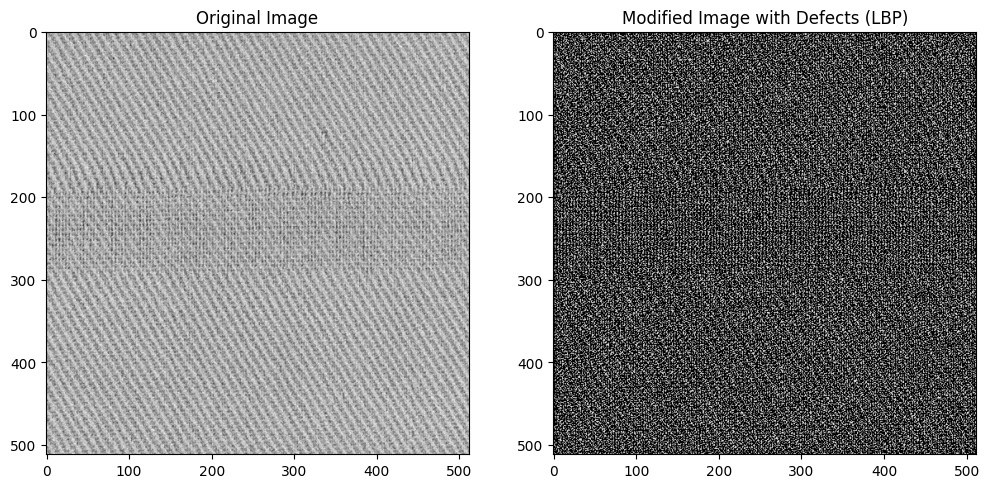

Number of Defective Pixels (LBP): 170524


In [31]:
# Step 1: Image Transformation - Convert to Grayscale
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
image_path = os.path.join(desktop_path, "0035.jpg")  # Update the filename if needed

# Load the color image
color_image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Save the grayscale image on desktop
gray_image_path = os.path.join(desktop_path, "0035_gray.jpg")
cv2.imwrite(gray_image_path, gray_image)
print(f"Grayscale image saved at {gray_image_path}")

from skimage import feature


def calculate_lbp(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate Local Binary Pattern
    lbp = feature.local_binary_pattern(gray_image, P=8, R=1, method="uniform")
    
    return lbp

def detect_defective_pixels_lbp(lbp, threshold):
    defective_pixels = lbp > threshold
    return defective_pixels

# Example usage:
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop")
image_path = os.path.join(desktop_path, "0035_gray.jpg")  # Update the filename if needed

try:
    image = cv2.imread(image_path)
    print("Image Loaded Successfully:", image is not None)

    # Calculate Local Binary Pattern
    lbp = calculate_lbp(image)

    # Use adaptive thresholding
    adaptive_threshold = cv2.adaptiveThreshold(lbp.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # Detect defective pixels using Local Binary Pattern and adaptive thresholding
    defective_pixels_lbp = adaptive_threshold == 255

    # Modify the image by setting defective pixels to 0
    modified_image_lbp = image.copy()
    modified_image_lbp[defective_pixels_lbp] = 0

    # Display the original and modified images
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(modified_image_lbp, cv2.COLOR_BGR2RGB)), plt.title('Modified Image with Defects (LBP)')

    plt.show()

    # Print the number of defective pixels using LBP
    num_defective_pixels_lbp = np.sum(defective_pixels_lbp)
    print("Number of Defective Pixels (LBP):", num_defective_pixels_lbp)

except ValueError as e:
    print(e)
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")